# Fair Division of Indivisible Goods

This is Jupyter Notebook coming along with the chapter 
* Chapter 12 (Handbook of Computational Social Choice)
To be used as part of the course of :
* The COST Summer School Lecture on Fair Division of Indivisible Items (San Sebastian, 2016)

## 1. Defining MARA problems

By importing problem, we can define fair division problems, by specifying a number of agents, a number of resources, and a type of preferences/culture. 

You can either:
* define a centralized MARA problem (all the resources are initially held by agent 0, the auctioneer)
* define a decentralized MARA problem (resources are initially randomly allocated)

In [4]:
from problem import Problem

In [5]:
p1 = Problem(3,4,'uniform',centralized=True)
print(p1)

agent 0{'r3': 41, 'r0': 16, 'r1': 59, 'r2': 75}
agent 1{'r3': 17, 'r0': 2, 'r1': 56, 'r2': 76}
agent 2{'r3': 59, 'r0': 48, 'r1': 3, 'r2': 64}



Printing the allocation allows to see which agent holds which resource, and the current utility of each agent. 

In [6]:
print(p1.printAllocation())

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0           ['r3', 'r0', 'r1', 'r2']	191
agent  1                                 []	 0
agent  2                                 []	 0



A problem also handles a **visibility graph** among agents. Note that in the centalized case, agent 0 is isolated from the rest (his utility is irrelevant). 

In [7]:
print (p1.visibility_graph)

{0: [], 1: [2], 2: [1]}


## 2. Fairness measures

In [8]:
import fairnessmeasures

In [9]:
p2 = Problem(3,6,'normalized',centralized=False)
print(p2)

agent 0{'r3': 0.191, 'r5': 0.277, 'r2': 0.238, 'r0': 0.098, 'r1': 0.017, 'r4': 0.179}
agent 1{'r3': 0.161, 'r5': 0.019, 'r2': 0.21, 'r0': 0.135, 'r1': 0.345, 'r4': 0.131}
agent 2{'r3': 0.497, 'r5': 0.044, 'r2': 0.077, 'r0': 0.011, 'r1': 0.243, 'r4': 0.127}



In [10]:
print(p2.printAllocation())

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                             ['r1']	0.017
agent  1                 ['r3', 'r2', 'r0']	0.506
agent  2                       ['r5', 'r4']	0.17099999999999999



We can check various fairness properties...

In [11]:
print(fairnessmeasures.isProportional(p2))

False


In [12]:
print(fairnessmeasures.egalitarianSW(p2))

0.017


... and build the envy matrix from which several measures can be obtained. 

In [13]:
em = fairnessmeasures.envyMatrix(p2)
print(em)
print("There are ", fairnessmeasures.nbEnviousAgents(em), " envious agents")
print("The maximum envy among two agents is ", fairnessmeasures.maxEnvy(em))

[[ 0.     0.51   0.439]
 [ 0.     0.     0.   ]
 [ 0.072  0.414  0.   ]]
There are  2  envious agents
The maximum envy among two agents is  0.51


## Example of the course

In [14]:
p3 = Problem(4,6,'empty', centralized=True)
p3.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print (p3)
print (p3.printAllocation())

agent 0{'r3': 0, 'r5': 0, 'r2': 0, 'r0': 0, 'r1': 0, 'r4': 0}
agent 1{'r3': 3, 'r5': 2, 'r2': 5, 'r0': 1, 'r1': 2, 'r4': 7}
agent 2{'r3': 1, 'r5': 2, 'r2': 8, 'r0': 2, 'r1': 6, 'r4': 1}
agent 3{'r3': 3, 'r5': 2, 'r2': 4, 'r0': 5, 'r1': 4, 'r4': 2}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0['r3', 'r5', 'r2', 'r0', 'r1', 'r4']	 0
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



## 3. Solving via MIP

By importing mipsolving we get access to functions allowing to optimally solve the problems via MIP formulations (see course). 
The program uses the Pulp libray for linear programming. 

In [15]:
import mipsolving

In [16]:
e3 = mipsolving.envyminimizingLP(p3,verbose=True)
print("the final max envy is ",e3)

agent  1  gets resource r3
agent  1  gets resource r4
agent  2  gets resource r2
agent  2  gets resource r5
agent  3  gets resource r0
agent  3  gets resource r1
the final max envy is  0.0


(Note that this has not modified the initial problem)

In [18]:
print(mipsolving.assignmentLP(p3,verbose=True))

agent  1  gets resource r3
agent  1  gets resource r4
agent  2  gets resource r2
agent  2  gets resource r5
agent  3  gets resource r0
agent  3  gets resource r1
9.0


For facilitating the run of several problems with varying or similar parameters, the module simulations provides a few functions. Let us illustrate this on a specific question. 

In [19]:
import simulations


### How likely is it to get an envy-free allocation? 

In [28]:
tested_resources = list(range(6,12)) # from 6 to 11 resources
tested_agents = [6] # only 6 agents
max_envy,ratio_ef = simulations.simulationOpt(10,tested_agents,tested_resources,'normalized')
#print (max_envy,ratio_ef)
print("Experiments completed!")

Experiments completed!


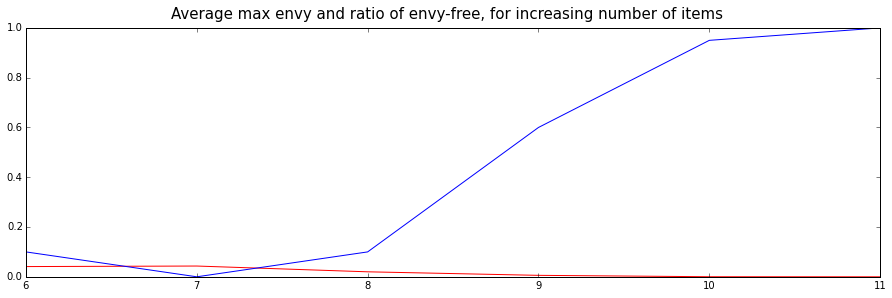

In [29]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab
figsize(12.5, 4)
p = np.linspace(tested_resources[0], tested_resources[0]+len(tested_resources)-1,len(tested_resources))
#print(p)
plt.plot(p, max_envy[0], color='red')
plt.plot(p, ratio_ef[0], color = 'blue')
legende = "Average max envy and ratio of envy-free, for increasing number of items"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.tight_layout()

## Protocols

In [30]:
import protocols

### Picking Sequences